PART A

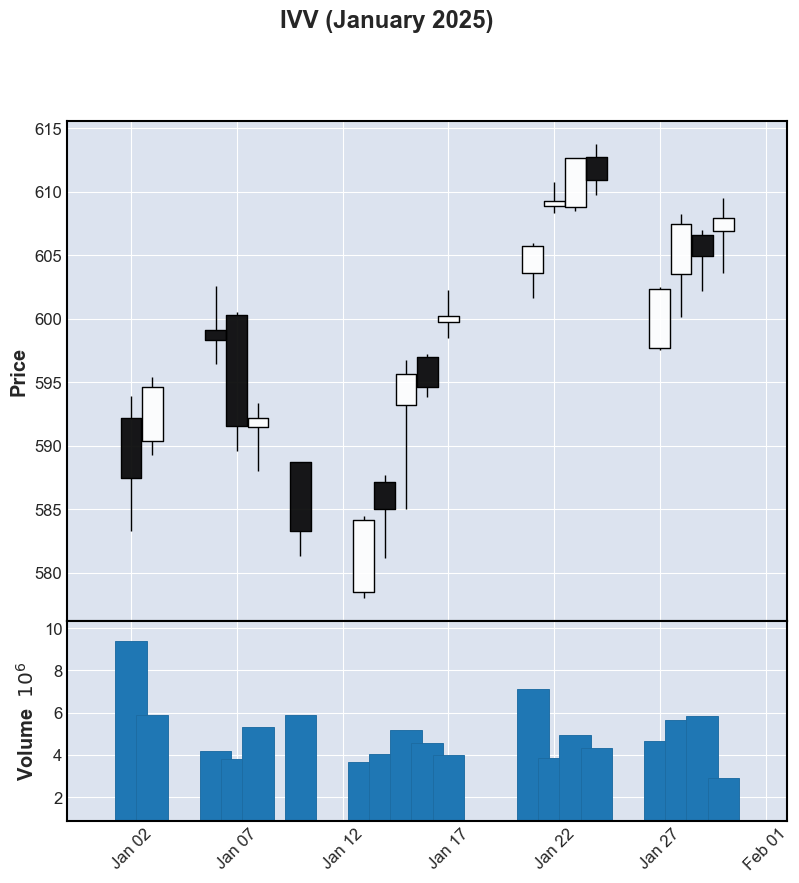

In [1]:
#First let's import all of our libraries 
import pandas as pd
import yfinance as yf
import mplfinance as mpf

#Next, let's download the data for IVV for January
start_date = "2025-01-01"
end_date = "2025-01-31"
df = yf.Ticker("IVV").history(start = start_date,end = end_date)

#Finally, let's plot everything
title = "IVV (January 2025)"
mpf.plot(df, type = "candle", volume = True, title = title, show_nontrading=True, figsize = (10,10))

PART B

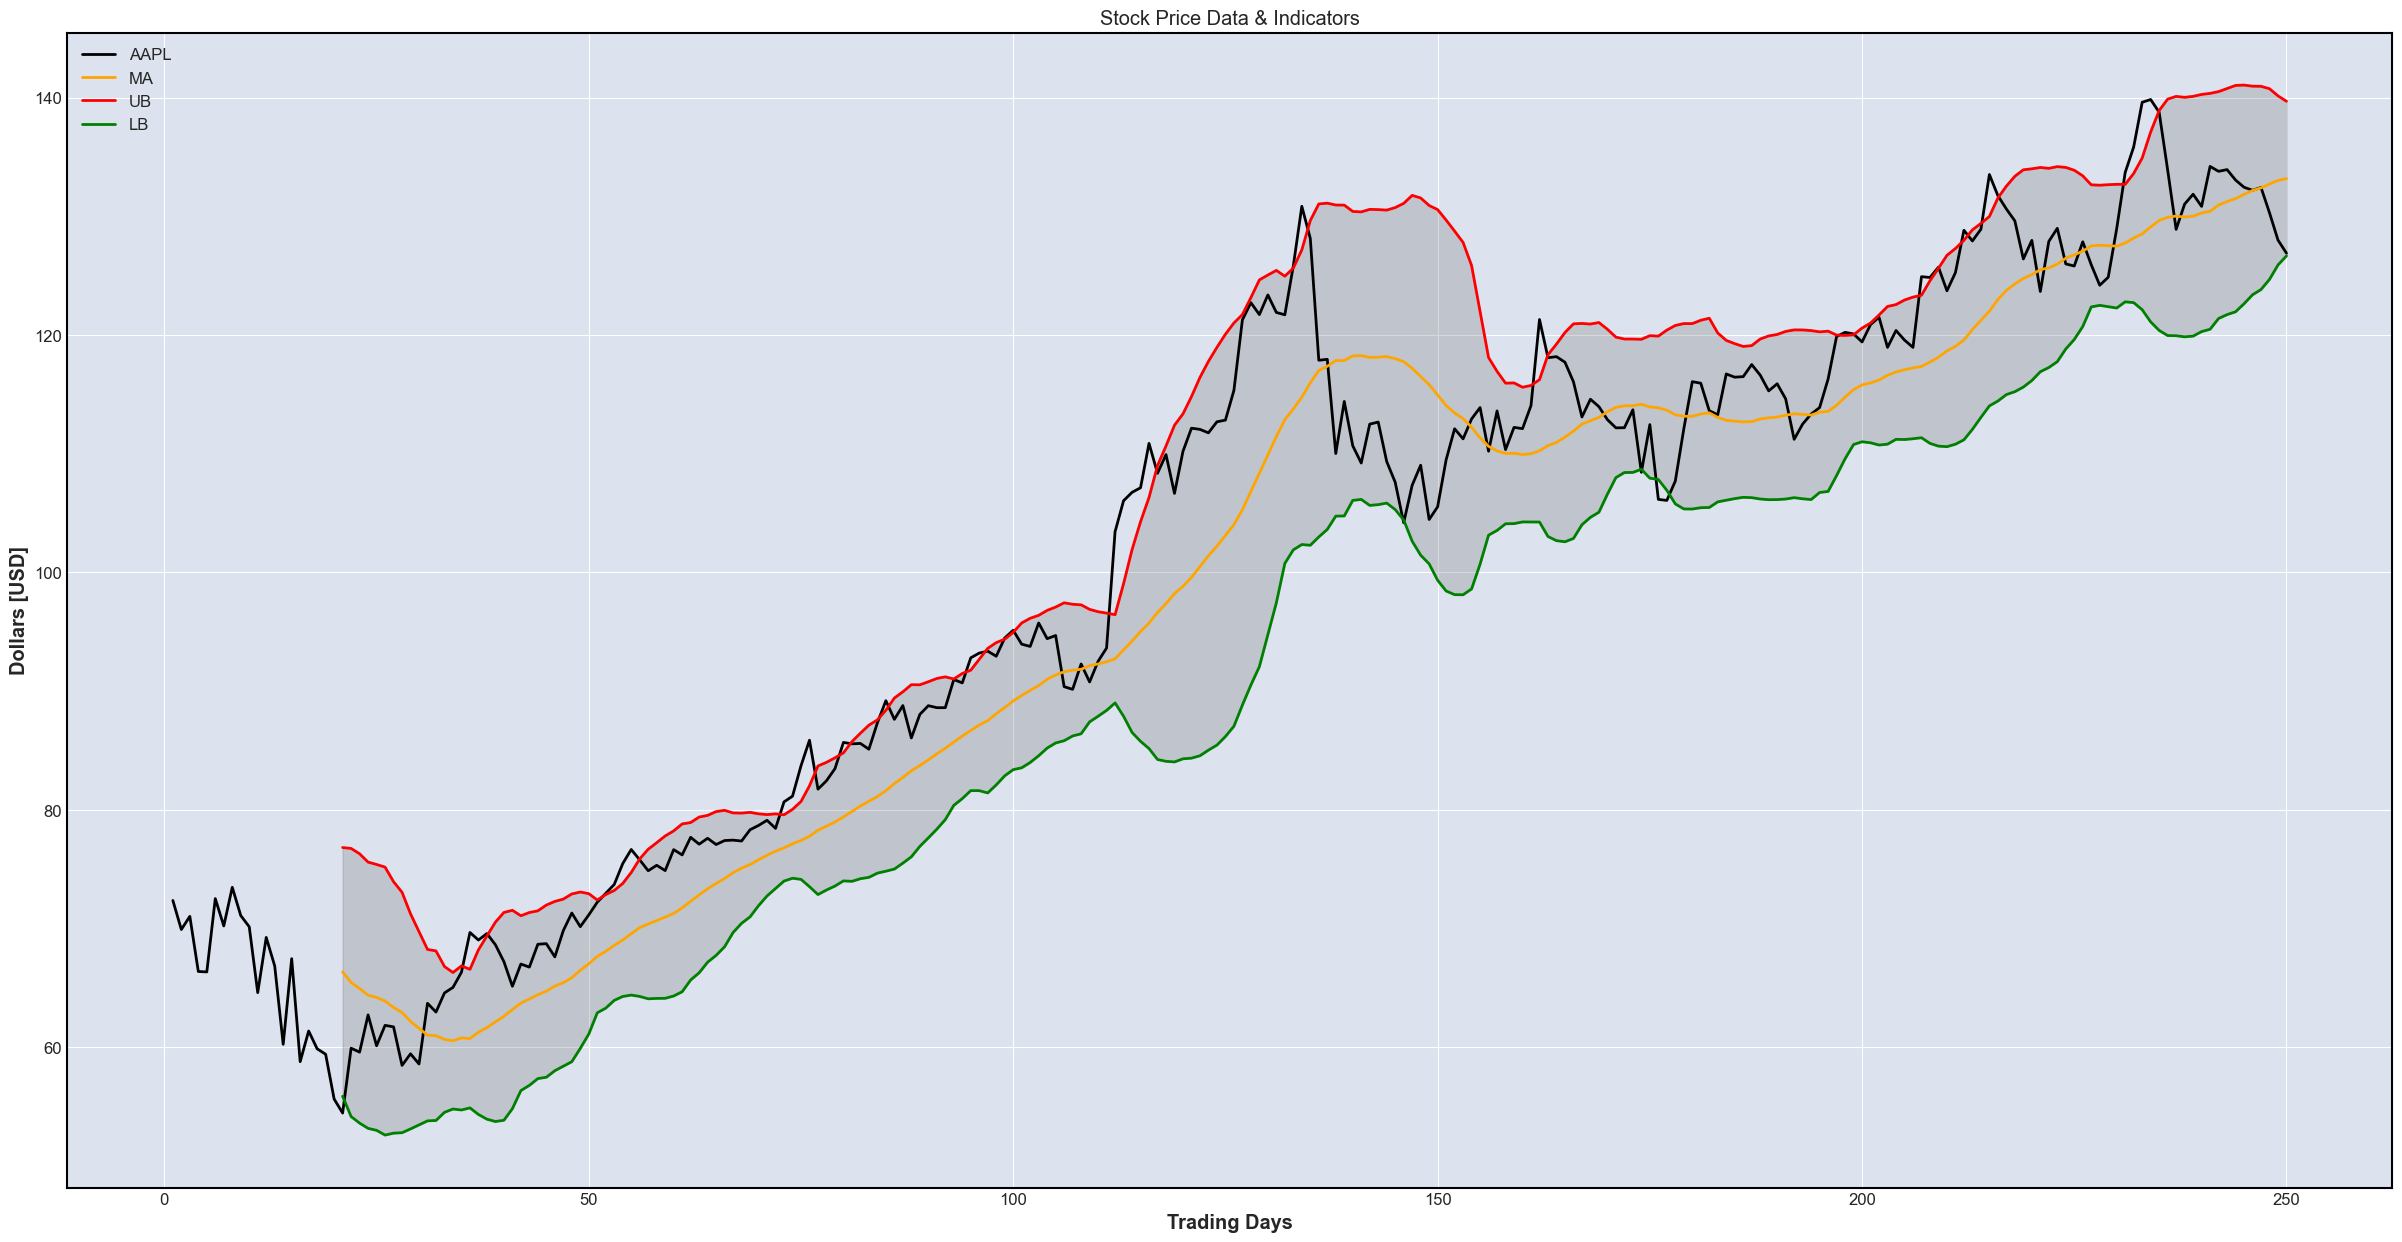

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#First, let's set up a data frame which holds the prices for AAPL over 250 trading days
df = pd.read_csv(r"C:\Users\kadil\Downloads\StockData.csv")
df_aapl = df[["Trading Day", "AAPL"]].iloc[:250].set_index('Trading Day')

#Next, let's calculate the 20 day simple average and the standard deviation
window = 20
df_aapl['SMA'] = df_aapl['AAPL'].rolling(window=window).mean().shift(1)
df_aapl['SD'] = df_aapl['AAPL'].rolling(window=window).std(ddof=0).shift(1)

#Next, let's calculate and plot the Bollinger Bands
df_aapl['UB'] = df_aapl['SMA'] + (2 * df_aapl['SD'])
df_aapl['LB'] = df_aapl['SMA'] - (2 * df_aapl['SD'])

#Then, let's plot everything
plt.figure(figsize = (30,15))
plt.plot(df_aapl['AAPL'], label = 'AAPL', color = 'black')
plt.plot(df_aapl['SMA'], label = 'MA', color = 'orange')
plt.plot(df_aapl['UB'], label = 'UB', color = 'red')
plt.plot(df_aapl['LB'], label = 'LB', color = 'green')

#Let's shade the area between the upper and lower band
plt.fill_between(df_aapl.index, df_aapl['UB'], df_aapl['LB'], color='gray', alpha = 0.3)

#Finally, let's print it!
plt.title('Stock Price Data & Indicators')
plt.xlabel('Trading Days')
plt.ylabel('Dollars [USD]')
plt.legend()
plt.show()
